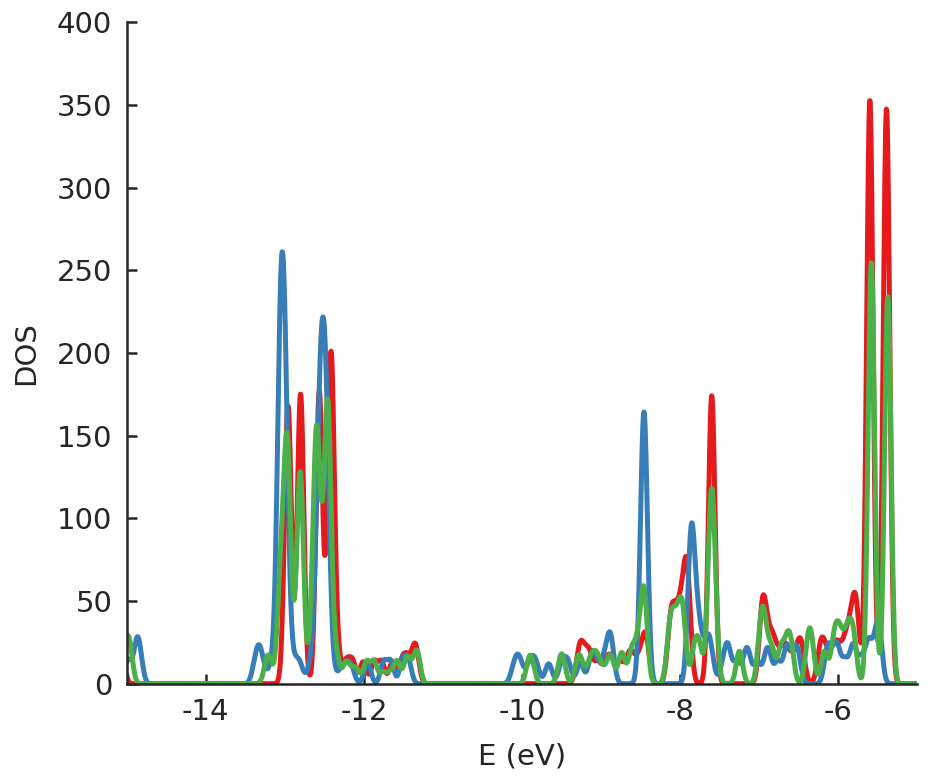

In [4]:
import pybinding as pb
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from math import ceil, sqrt, pi, cos,exp, sin
from scipy import integrate
from scipy.optimize import minimize as minimize_scipy
import matplotlib.mlab as mlab
import matplotlib.gridspec as gs
import sys
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit

from PTMC_TB.gamma import Stack
from PTMC_TB.materials import *
from PTMC_TB.charge import getCharges, electricfield, getpotential_direct, getpotential_ewald
import PTMC_TB.fitting as fitting
import PTMC_TB.QE_util as QE


pb.pltutils.use_style()

%matplotlib widget
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300

kpoints = QE.get_fullband_kpoints()
points_index = QE.fullband_index

forced_a = 0.376


inse_ = InSe()
gase_ = GaSe()
gas_ = GaS()
gate_ = GaTe()


matstackgase = [gase_,gase_,gase_,gase_,gase_,gase_,gase_,gase_,gase_]
matstackinse = [inse_,inse_,inse_,inse_,inse_,inse_,inse_,inse_,inse_]
matstackhetero = [inse_,gase_,gase_,gase_,gase_,gase_,gase_,inse_,inse_]
matgase = Stack(matstackgase,0.375)
matinse = Stack(matstackinse,0.4)
mathetero = Stack(matstackhetero,0.388)
latticega = matgase.lat
latticein = matinse.lat
latticehetero = mathetero.lat
kpoints[:,0] *= pi*2/matgase.a
kpoints[:,1] *= pi*2/matgase.a
kpoints[:,2] *= pi*2/matgase.c
a=matgase.a
c=matgase.c
gamma = [0, 0, 0]
A = [0, 0, pi/c]
k = [4*pi/(3*a),0,0]
m = [pi/a,-pi/(sqrt(3)*a),0]
l = [4*pi/(3*a),0,pi/c]
h = [pi/a,-pi/(sqrt(3)*a),pi/c]

modelgase = pb.Model(
latticega,
pb.translational_symmetry()
)
solverga = pb.solver.lapack(modelgase)

modelinse = pb.Model(
latticein,
pb.translational_symmetry()
)
solverin = pb.solver.lapack(modelinse)

modelhetero = pb.Model(
latticehetero,
pb.translational_symmetry()
)
solverhetero = pb.solver.lapack(modelhetero)

dosga = solverga.calc_dos_full(np.linspace(-15, -5, 2000), 0.04,QE.brillouin_highdens)  # [eV]

dosga.plot()

dosin = solverin.calc_dos_full(np.linspace(-15, -5, 2000), 0.04,QE.brillouin_highdens)  # [eV]
dosin.plot()

doshetero = solverhetero.calc_dos_full(np.linspace(-15, -5, 2000), 0.04,QE.brillouin_highdens)  # [eV]
doshetero.plot()


In [16]:
from kplib.python.kpLib import get_kpoints
import PTMC_TB.QE_util as QE
from pymatgen.io.vasp.inputs import Poscar

poscar = Poscar.from_string(QE.poscar_GaSe_r3m)

kpts = get_kpoints(poscar.structure, minDistance=100, include_gamma=True)

kpts

{'min_periodic_distance': 103.59739775142302,
 'num_distinct_kpts': 257,
 'num_total_kpts': 2700,
 'coords': [[0.0, 0.0, 0.0],
  [0.03333333333333333, 0.0, 0.8888888888888888],
  [0.06666666666666667, 0.0, 0.7777777777777778],
  [0.1, 0.0, 0.6666666666666667],
  [0.13333333333333333, 0.0, 0.5555555555555556],
  [0.16666666666666666, 0.0, 0.4444444444444444],
  [0.2, 0.0, 0.33333333333333337],
  [0.23333333333333334, 0.0, 0.22222222222222232],
  [0.26666666666666666, 0.0, 0.11111111111111116],
  [0.3, 0.0, 0.0],
  [0.3333333333333333, 0.0, 0.8888888888888888],
  [0.36666666666666664, 0.0, 0.7777777777777779],
  [0.4, 0.0, 0.6666666666666667],
  [0.43333333333333335, 0.0, 0.5555555555555556],
  [0.4666666666666667, 0.0, 0.44444444444444464],
  [0.5, 0.0, 0.3333333333333335],
  [0.5333333333333333, 0.0, 0.22222222222222232],
  [0.5666666666666667, 0.0, 0.11111111111111116],
  [0.6, 0.0, 0.0],
  [0.6333333333333333, 0.0, 0.8888888888888888],
  [0.6666666666666666, 0.0, 0.7777777777777777],